# Variance of Jarzynski estimator for Rabi Hamiltonian

In [36]:
# Frount matter
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle

#If your screen has retina display this will increase resolution of plots
%config InlineBackend.figure_format = 'retina'

# Read data
with open("psi.pickle", "rb") as f0:
    psi = pickle.load(f0)
with open("E.pickle", "rb") as f1:
    E = pickle.load(f1)
with open("simulation.pickle", "rb") as f2:
    psit = pickle.load(f2)

In [37]:
# Basic constants and parameters
# grid points
N=2000

# spatial grid
XMin=-50
XMax=50
X=np.linspace(XMin, XMax, N)
X2=np.linspace(XMin, XMax, 2*N)
dx = X[1] - X[0]

# momentum grid
P=(2*np.pi/(XMax-XMin))*np.concatenate((np.arange(0,N//2), np.arange(-N//2,0)))
P2 = np.array([x for x in P for _ in range(2)])


# simulation points
M = 500                 

# initial and final conditions
w0=0.35
w1=1
dw = (w1-w0)/M

#define pauli matrixes
S0 = np.array([[1, 0], [0, 1]])
S1 = np.array([[0, 1], [1, 0]])
S3 = np.array([[1, 0], [0, -1]])

n=50

## Function defination

### Partition function


In [38]:
def Z(w,a,b,beta):
    Z_0=0
    for v in range(n):
        energy = E[w, a, b][v]
        Z_0 += np.exp(-beta * energy)  
    return Z_0

In [39]:
# Example: Z(0,0,0,6)
print(Z(0,0,0,6))

0.7976143305601139


### Helmholtz free energy difference $\Delta F$

In [40]:
def delta_F(a,b,beta):
    delta_F_0=1/beta*math.log(Z(0,a,b,beta)/Z(1,a,b,beta))
    return delta_F_0

In [41]:
# Example: delta_F(1,1,6) 
print(delta_F(1,1,6))

3.4122749835330293


### Variance list for different $\hbar \beta$

In [42]:
# beta range from 0.3 to 8
beta_range = np.linspace(0.1, 10, 100)

In [43]:
def var_list(a,b,tau):
    var_list_0 = []
    for beta in beta_range:
        Fm=0.0
        Sm=0.0
        Z0= Z(0,a,b,beta)
        DF= delta_F(a,b,beta)
        for i in range(n):
            for j in range(n):
                psi_t=psit[a,b,i,tau]
                psi1=psi[1,a,b][j]
                abs_dot=np.abs(np.dot(psi1,psi_t))**2
                Fm+=np.exp(-beta*E[1,a,b][j])*abs_dot/Z0
                Sm+=np.exp(-beta*(2*E[1,a,b][j]-E[0,a,b][i]))*abs_dot/Z0
        Var=Sm-Fm**2
        Var_dis=Var/np.exp(-2*beta*DF)
        var_list_0.append(Var_dis)
    return var_list_0

## Results

### Different evolution time

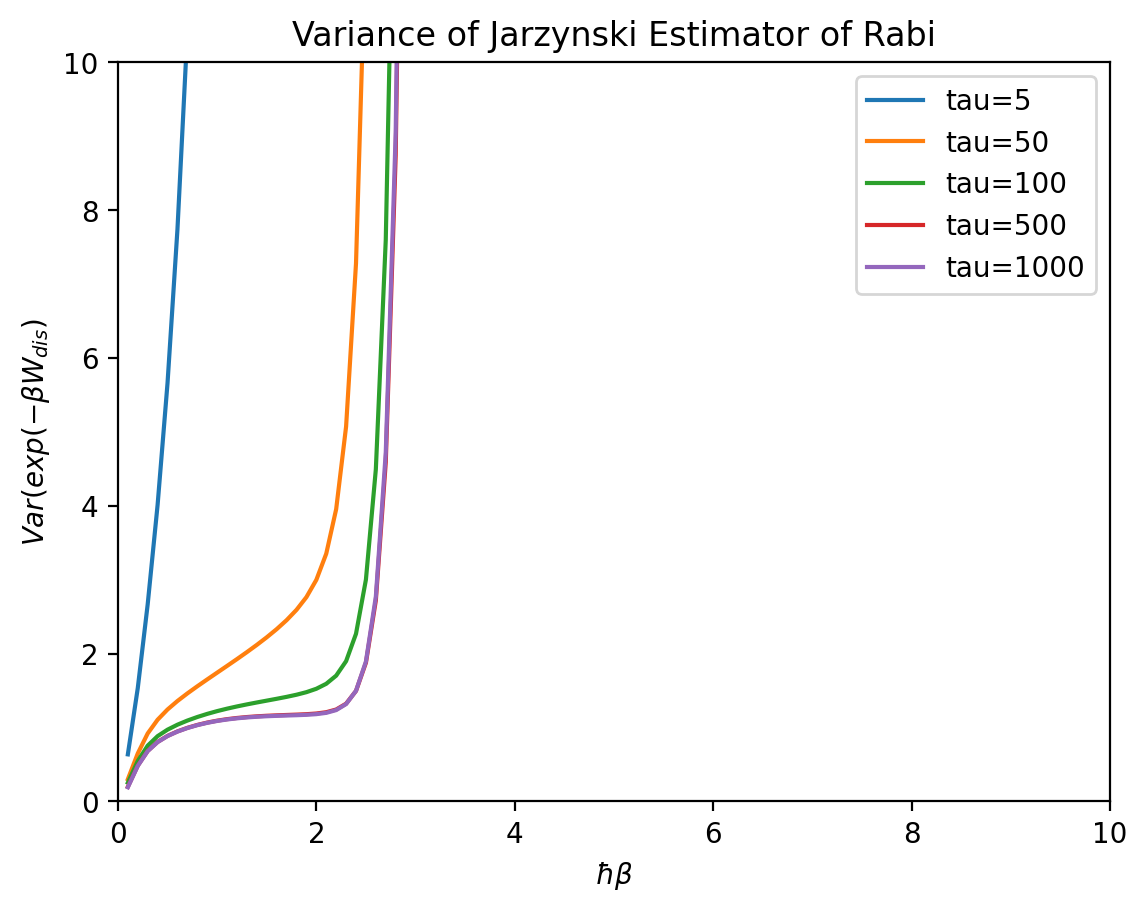

In [44]:
a = 1
b = 1
var_lists = []
taus = [5,50,100,500,1000]


for tau in taus:
    var_lists.append(var_list(a, b, tau))
    plt.plot(beta_range, var_lists[-1], label=f'tau={tau}')

plt.xlabel(r'$ \hbar \beta$')
plt.ylabel(r'$Var(exp(-\beta W_{dis})$')
plt.title('Variance of Jarzynski Estimator of Rabi')
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.legend() 
plt.show()

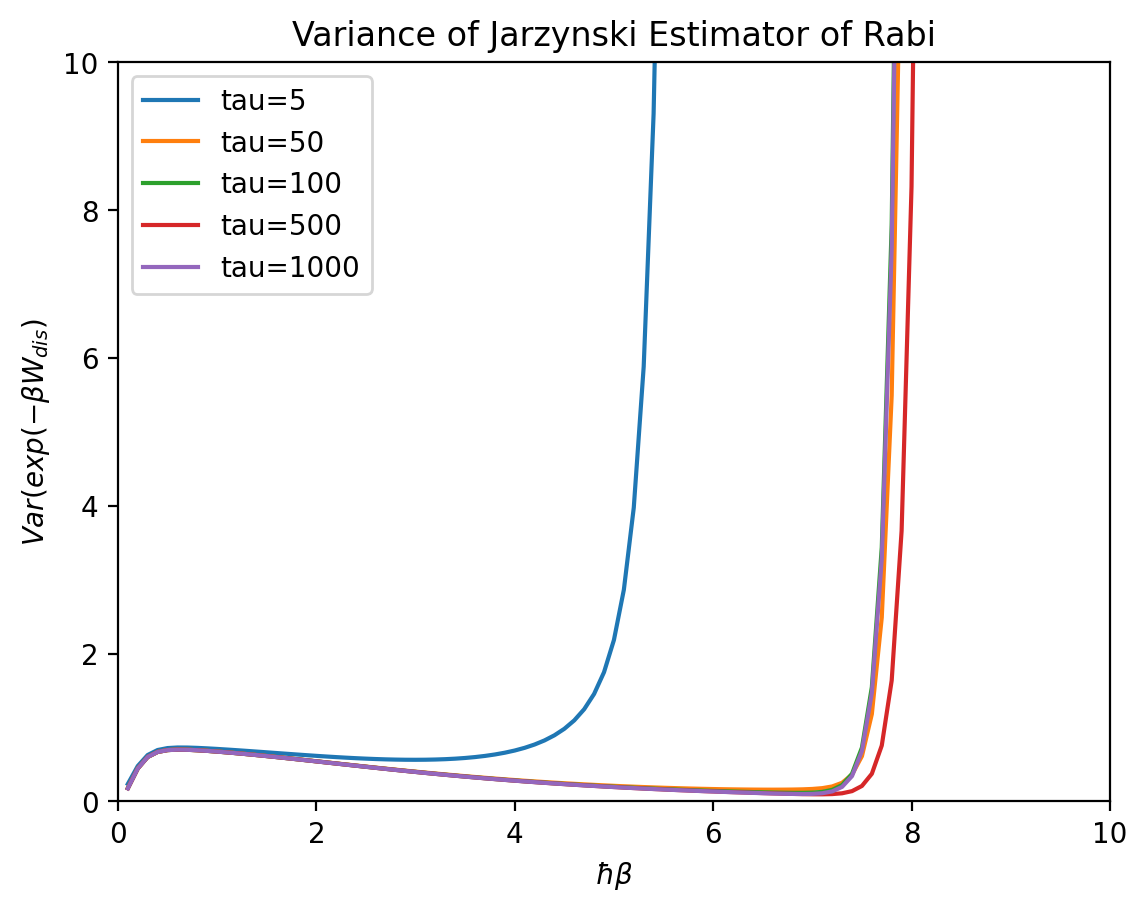

In [45]:
a = 0
b = 0
var_lists = []
taus = [5,50,100,500,1000]


for tau in taus:
    var_lists.append(var_list(a, b, tau))
    plt.plot(beta_range, var_lists[-1], label=f'tau={tau}')

plt.xlabel(r'$ \hbar \beta$')
plt.ylabel(r'$Var(exp(-\beta W_{dis})$')
plt.title('Variance of Jarzynski Estimator of Rabi')
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.legend() 
plt.show()

### Different x-coupling strength

In [48]:
print(var_list(0,5,5)[49])

3.088652400822485


/var/folders/_2/9y8_tvq51x76mq91wy47h4lw0000gn/T/ipykernel_5936/1667701517.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  delta_F_0=1/beta*math.log(Z(0,a,b,beta)/Z(1,a,b,beta))
/var/folders/_2/9y8_tvq51x76mq91wy47h4lw0000gn/T/ipykernel_5936/2971565304.py:16: RuntimeWarning: overflow encountered in scalar divide
  Var_dis=Var/np.exp(-2*beta*DF)
/var/folders/_2/9y8_tvq51x76mq91wy47h4lw0000gn/T/ipykernel_5936/2971565304.py:16: RuntimeWarning: invalid value encountered in scalar divide
  Var_dis=Var/np.exp(-2*beta*DF)
/var/folders/_2/9y8_tvq51x76mq91wy47h4lw0000gn/T/ipykernel_5936/2644075803.py:5: RuntimeWarning: overflow encountered in exp
  Z_0 += np.exp(-beta * energy)
/var/folders/_2/9y8_tvq51x76mq91wy47h4lw0000gn/T/ipykernel_5936/1667701517.py:2: RuntimeWarning: invalid value encountered in scalar divide
  delta_F_0=1/beta*math.log(Z(0,a,b,beta)/Z(1,a,b,beta))


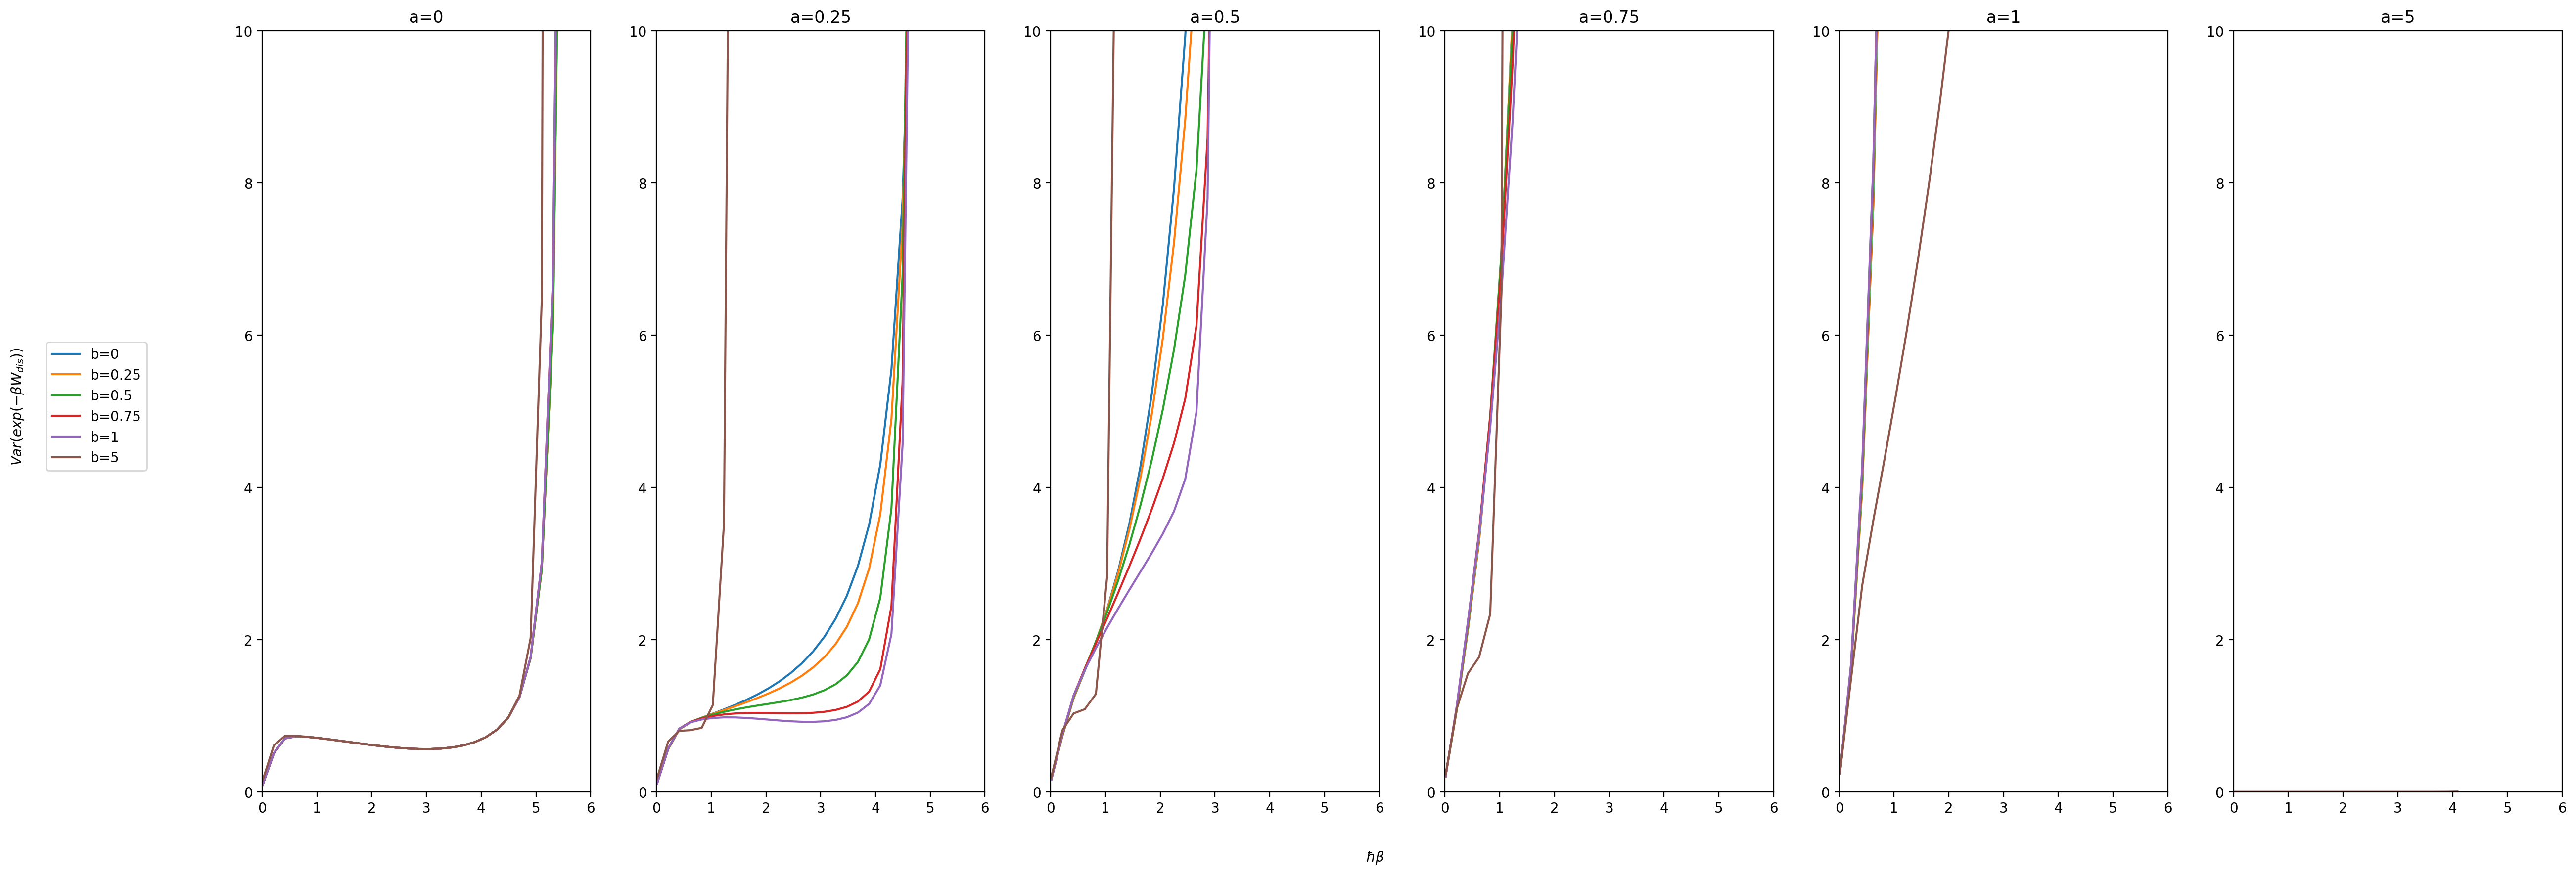

In [20]:
tau= 5
a_s=[0,0.25,0.5,0.75,1,5]
fig, axs = plt.subplots(nrows=1, ncols=len(a_s), figsize=(30, 10))

for i, a in enumerate(a_s):
    for j, b in enumerate([0, 0.25, 0.5, 0.75, 1, 5]):
        var_list_data = var_list(a, b, tau)
        if i == 0:
            axs[i].plot(beta_range, var_list_data, label=f'b={b}')
        else:
            axs[i].plot(beta_range, var_list_data)
        axs[i].set_title(f'a={a}')
        axs[i].set_ylim(0, 10)
        axs[i].set_xlim(0, 6)

fig.text(0.5, 0.04, r'$\hbar \beta$', ha='center')
fig.text(0.04, 0.5, r'$Var(exp(-\beta W_{dis}))$', va='center', rotation='vertical')
fig.legend(loc='center left', bbox_to_anchor=(0.05, 0.5))

plt.show()

### Different z-coupling strength

/var/folders/_2/9y8_tvq51x76mq91wy47h4lw0000gn/T/ipykernel_5936/1667701517.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  delta_F_0=1/beta*math.log(Z(0,a,b,beta)/Z(1,a,b,beta))


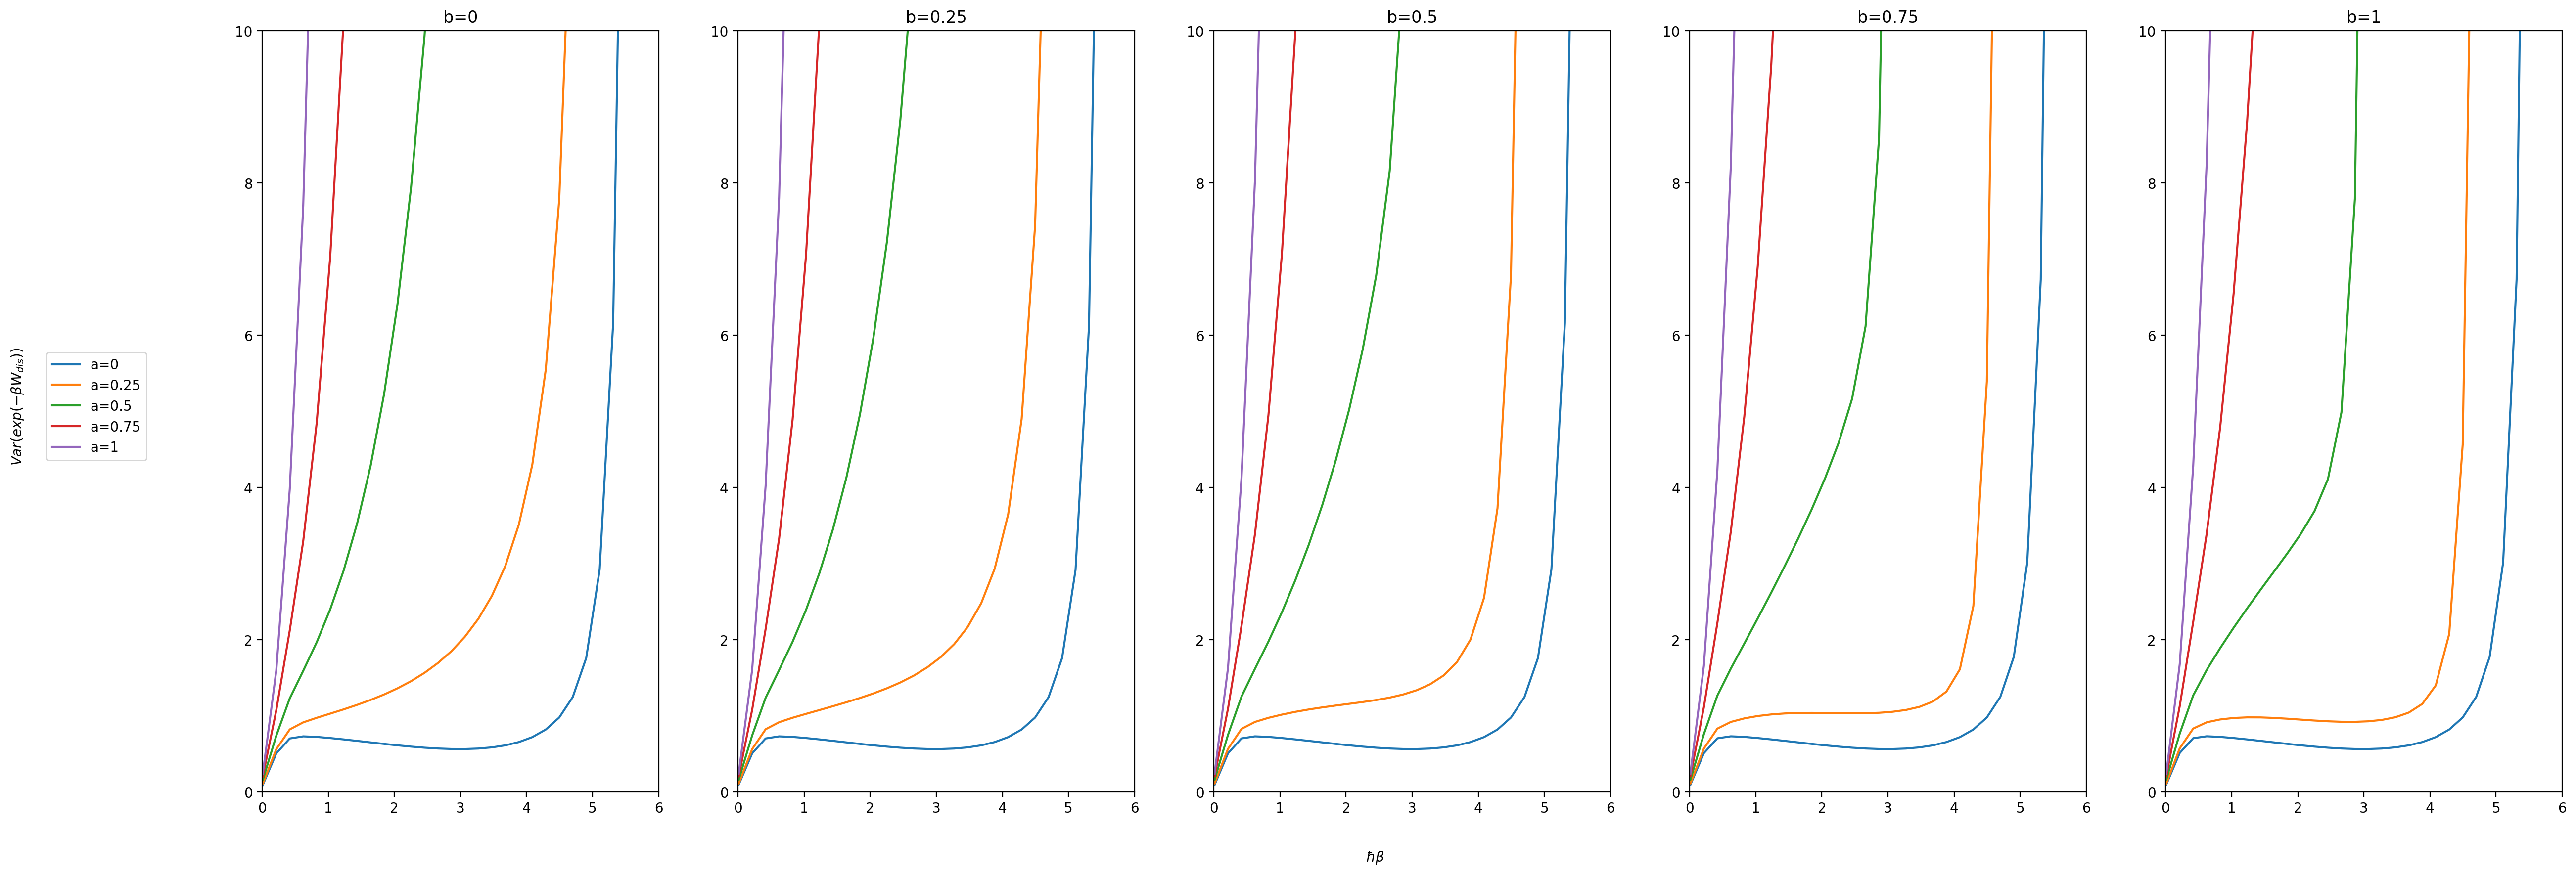

In [18]:
tau= 5
b_s=[0,0.25,0.5,0.75,1]
fig, axs = plt.subplots(nrows=1, ncols=len(b_s), figsize=(30, 10))

for i, b in enumerate(b_s):
    for j, a in enumerate([0, 0.25, 0.5, 0.75, 1, 5]):
        var_list_data = var_list(a, b, tau)
        if i == 0:
            axs[i].plot(beta_range, var_list_data, label=f'a={a}')
        else:
            axs[i].plot(beta_range, var_list_data)
        axs[i].set_title(f'b={b}')
        axs[i].set_ylim(0, 10)
        axs[i].set_xlim(0, 6)

fig.text(0.5, 0.04, r'$\hbar \beta$', ha='center')
fig.text(0.04, 0.5, r'$Var(exp(-\beta W_{dis}))$', va='center', rotation='vertical')

fig.legend(loc='center left', bbox_to_anchor=(0.05, 0.5))
plt.show()